<a href="https://colab.research.google.com/github/semesarker/A-Dilated-Attention-U-Net-Based-Approach-on-Speech-Emotion-Recognition/blob/main/Dilated_Attention_Unet_model_on_Data_Augmented_BanglaSER_using_feature_concatenation(mfcc%26mel_spectrogram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/thesis/bangla-ser-database.zip'

Archive:  /content/drive/MyDrive/thesis/bangla-ser-database.zip
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-02-02-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-02-01-01-01-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-01-03-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-02-03-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-01-02-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-03-02-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-02-01-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-03-03-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-01-01-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-01-01-03-01-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-02-01-01-02-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-02-01-01-03-01.wav  
  inflating: t9h6p943xy-5/BanglaSER/Actor 01/03-01-02-01-02-01-01.wav  


In [ ]:
# Keras
#import tensorflow as tf
import IPython
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


# from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
banglaSER_final = '/content/drive/MyDrive/thesis/Test_New/output/'
banglaSER_final_directory_list = os.listdir(banglaSER_final)
banglaSER_final_directory_list


['03-01-03-02-02-03-19_Clean_1217.wav',
 '03-01-03-02-02-03-19_Noisy_1217.wav',
 '03-01-03-02-02-03-19_shift_1217.wav',
 '03-01-03-02-02-03-19_stretchy_1217.wav',
 '03-01-05-01-02-03-19_Clean_1218.wav',
 '03-01-05-01-02-03-19_Noisy_1218.wav',
 '03-01-05-01-02-03-19_shift_1218.wav',
 '03-01-05-01-02-03-19_stretchy_1218.wav',
 '03-01-03-02-01-01-19_Clean_1219.wav',
 '03-01-03-02-01-01-19_Noisy_1219.wav',
 '03-01-03-02-01-01-19_shift_1219.wav',
 '03-01-03-02-01-01-19_stretchy_1219.wav',
 '03-01-02-01-03-01-19_Clean_1220.wav',
 '03-01-02-01-03-01-19_Noisy_1220.wav',
 '03-01-02-01-03-01-19_shift_1220.wav',
 '03-01-02-01-03-01-19_stretchy_1220.wav',
 '03-01-01-01-02-02-19_Clean_1221.wav',
 '03-01-01-01-02-02-19_Noisy_1221.wav',
 '03-01-01-01-02-02-19_shift_1221.wav',
 '03-01-01-01-02-02-19_stretchy_1221.wav',
 '03-01-02-01-01-01-19_Clean_1222.wav',
 '03-01-02-01-01-01-19_Noisy_1222.wav',
 '03-01-02-01-01-01-19_shift_1222.wav',
 '03-01-02-01-01-01-19_stretchy_1222.wav',
 '03-01-04-02-01-01-19

In [ ]:
a=list()
b=list()
c=list()
banglaSER_final_directory_list = os.listdir(banglaSER_final)
file_path = []
file_emotion = []
for directory in banglaSER_final_directory_list:

        part1 = directory.split('_')[0]
        # print(part1)
        part2 = part1.split('-')
        # print(part2)
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part2[2]))
        file_path.append(banglaSER_final +  directory )

        a.append(banglaSER_final + directory )
        b.append(part1)
        c.append(part2)

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
banglaSER_final_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions

banglaSER_final_df.Emotions.replace({1:'happy', 2:'sad', 3:'angry', 4:'surprise', 5:'neutral'}, inplace=True)
banglaSER_final_df

,Emotions,Path
0,angry,/content/drive/MyDrive/thesis/Test_New/output/...
1,angry,/content/drive/MyDrive/thesis/Test_New/output/...
2,angry,/content/drive/MyDrive/thesis/Test_New/output/...
3,angry,/content/drive/MyDrive/thesis/Test_New/output/...
4,neutral,/content/drive/MyDrive/thesis/Test_New/output/...
...,...,...
5863,angry,/content/drive/MyDrive/thesis/Test_New/output/...
5864,surprise,/content/drive/MyDrive/thesis/Test_New/output/...
5865,surprise,/content/drive/MyDrive/thesis/Test_New/output/...
5866,surprise,/content/drive/MyDrive/thesis/Test_New/output/...


In [ ]:
banglaSER_final_df.Emotions.value_counts()

angry       1224
sad         1224
happy       1224
surprise    1224
neutral      972
Name: Emotions, dtype: int64

In [ ]:
# Method 3
import scipy
from scipy.io import wavfile
sample_rate= 16000
# function to convert the information into
# some readable format
def output_duration(length):
	hours = length // 3600 # calculate in hours
	length %= 3600
	mins = length // 60 # calculate in minutes
	length %= 60
	seconds = length # calculate in seconds

	return hours, mins, seconds

# sample_rate holds the sample rate of the wav file
# in (sample/sec) format
# data is the numpy array that consists
# of actual data read from the wav file
count = 0
for r in np.array(banglaSER_final_df.Path):
  sample_rate, data = wavfile.read(r)

  len_data = len(data) # holds length of the numpy array

  t = len_data / sample_rate # returns duration but in floats

  hours, mins, seconds = output_duration(int(t))
  print('Total Duration: {}:{}:{}'.format(hours, mins, seconds))
  count= count+1
print(count)

Streaming output truncated to the last 5000 lines.
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:4
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:4
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:4
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:4
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:4
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:4
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:3
Total Duration: 0:0:4
Tot

In [ ]:
emotion='angry'
path = np.array(banglaSER_final_df.Path[banglaSER_final_df.Emotions==emotion])[400]
data, sr = librosa.load(path,sr=16000)
IPython.display.Audio(data, rate=16000)

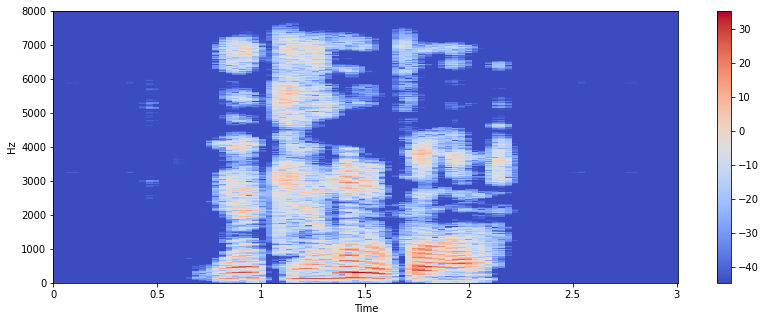

In [ ]:
emotion='angry'
path = np.array(banglaSER_final_df.Path[banglaSER_final_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
st_data = np.abs(librosa.stft(data,n_fft=2048,hop_length=512))
st_db = librosa.amplitude_to_db(st_data)
plt.figure(figsize=(14, 5))
librosa.display.specshow(st_db, sr=16000, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
def create_mel_spectrogram(data, sr, e):
    mel_signal = librosa.feature.melspectrogram(y=data, sr=sr,n_fft=2048,hop_length=512, n_mels=30)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(12, 3))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

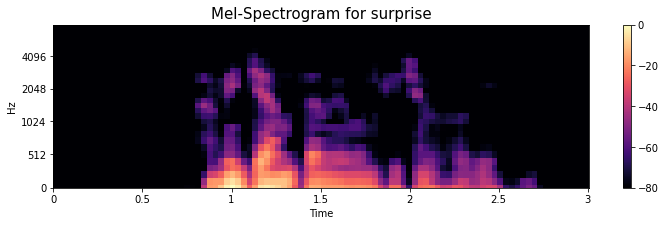

In [ ]:
emotion='surprise'
path = np.array(banglaSER_final_df.Path[banglaSER_final_df.Emotions==emotion])[50]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

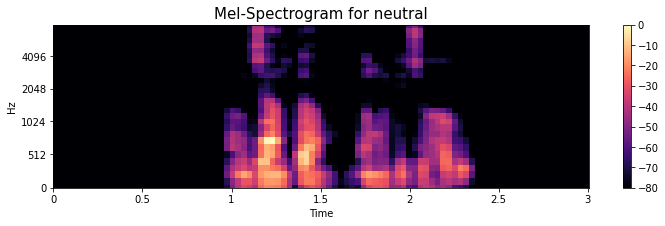

In [ ]:
emotion='neutral'
path = np.array(banglaSER_final_df.Path[banglaSER_final_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

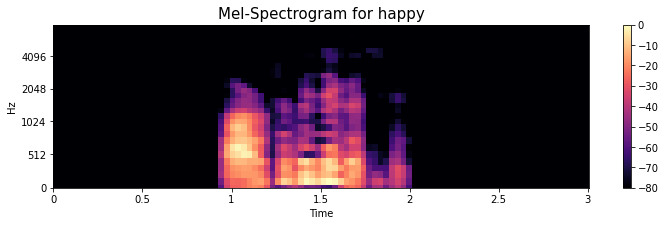

In [ ]:
emotion='happy'
path = np.array(banglaSER_final_df.Path[banglaSER_final_df.Emotions==emotion])[70]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

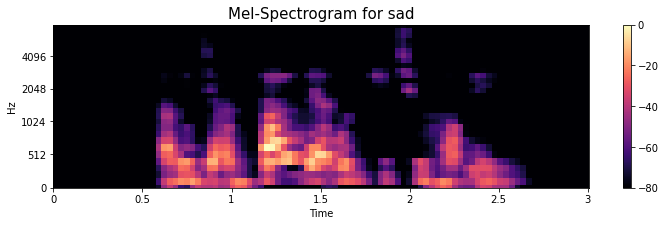

In [ ]:
emotion='sad'
path = np.array(banglaSER_final_df.Path[banglaSER_final_df.Emotions==emotion])[100]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

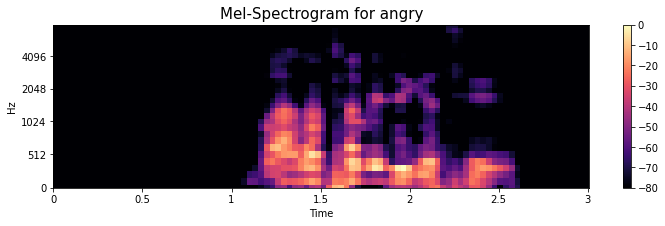

In [ ]:
emotion='angry'
path = np.array(banglaSER_final_df.Path[banglaSER_final_df.Emotions==emotion])[120]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=np.abs(librosa.feature.melspectrogram(data,sr=sr,n_fft=2048,hop_length=512,n_mels=30))
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

In [ ]:
def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time',sr=sr)
    plt.ylabel('MFCC')
    plt.colorbar(format='%+02.0f dB')

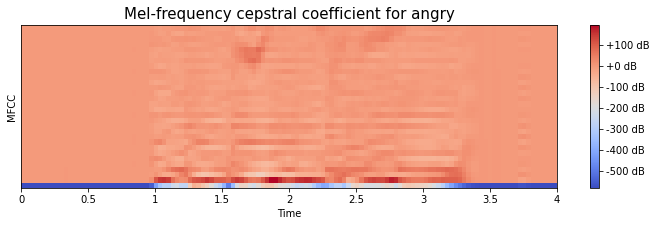

In [ ]:
emotion='angry'
path = np.array(banglaSER_final_df.Path[banglaSER_final_df.Emotions==emotion])[250]
data, sr = librosa.load(path, sr=16000, duration=4)
create_mfcc(data, sr, emotion)

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=3
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,94,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate

                               ,duration=3

                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,48000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_fft=2048,hop_length=512)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate,n_fft=2048,hop_length=512, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=0)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel_mfcc = prepare_data(banglaSER_final_df,n=60,mfcc=1,mel=1)

  0%|          | 11/5868 [00:00<01:48, 53.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 24/5868 [00:00<01:41, 57.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 30/5868 [00:00<01:45, 55.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

  1%|          | 43/5868 [00:00<01:42, 57.04it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 57/5868 [00:00<01:37, 59.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 69/5868 [00:01<01:39, 58.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

  1%|▏         | 75/5868 [00:01<01:44, 55.48it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 86/5868 [00:01<02:13, 43.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 96/5868 [00:01<02:11, 43.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 101/5868 [00:02<02:37, 36.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 110/5868 [00:02<02:32, 37.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 114/5868 [00:02<02:45, 34.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 122/5868 [00:02<03:02, 31.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 126/5868 [00:02<03:13, 29.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 133/5868 [00:03<03:19, 28.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 141/5868 [00:03<03:12, 29.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 147/5868 [00:03<03:17, 29.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 151/5868 [00:03<03:12, 29.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 159/5868 [00:03<03:05, 30.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 163/5868 [00:04<03:08, 30.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 170/5868 [00:04<03:26, 27.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 176/5868 [00:04<03:24, 27.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 184/5868 [00:04<03:11, 29.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 192/5868 [00:05<03:02, 31.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 196/5868 [00:05<02:56, 32.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 204/5868 [00:05<02:55, 32.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 212/5868 [00:05<02:53, 32.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 220/5868 [00:05<02:53, 32.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 233/5868 [00:06<02:04, 45.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 245/5868 [00:06<01:49, 51.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 258/5868 [00:06<01:40, 55.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 271/5868 [00:06<01:36, 58.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 283/5868 [00:07<01:39, 55.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 296/5868 [00:07<01:34, 58.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 308/5868 [00:07<01:37, 56.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 321/5868 [00:07<01:33, 59.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 333/5868 [00:07<01:33, 59.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 346/5868 [00:08<01:33, 59.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 358/5868 [00:08<01:36, 57.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 370/5868 [00:08<01:36, 57.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 377/5868 [00:08<01:34, 58.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 391/5868 [00:08<01:31, 60.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 404/5868 [00:09<01:36, 56.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 417/5868 [00:09<01:32, 59.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 429/5868 [00:09<01:31, 59.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 441/5868 [00:09<01:33, 58.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 453/5868 [00:09<01:33, 57.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 466/5868 [00:10<01:34, 57.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 479/5868 [00:10<01:32, 58.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 491/5868 [00:10<01:31, 58.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 504/5868 [00:10<01:30, 59.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 516/5868 [00:11<01:32, 58.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 528/5868 [00:11<01:31, 58.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 540/5868 [00:11<01:31, 58.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 553/5868 [00:11<01:29, 59.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 567/5868 [00:11<01:27, 60.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 574/5868 [00:12<01:27, 60.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 588/5868 [00:12<01:29, 59.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 602/5868 [00:12<01:26, 60.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 616/5868 [00:12<01:25, 61.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 630/5868 [00:12<01:25, 61.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 644/5868 [00:13<01:25, 60.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 658/5868 [00:13<01:25, 60.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 665/5868 [00:13<01:27, 59.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 679/5868 [00:13<01:27, 59.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 692/5868 [00:14<01:27, 58.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 705/5868 [00:14<01:25, 60.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 719/5868 [00:14<01:25, 60.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 733/5868 [00:14<01:26, 59.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 745/5868 [00:14<01:26, 59.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 759/5868 [00:15<01:23, 61.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 766/5868 [00:15<01:25, 59.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 13%|█▎        | 778/5868 [00:15<01:29, 56.72it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 791/5868 [00:15<01:27, 57.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 805/5868 [00:15<01:23, 60.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 812/5868 [00:16<01:31, 55.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 818/5868 [00:16<01:56, 43.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 823/5868 [00:16<02:11, 38.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 832/5868 [00:16<02:31, 33.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 836/5868 [00:16<02:32, 32.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 844/5868 [00:17<02:42, 30.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 851/5868 [00:17<02:51, 29.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 855/5868 [00:17<02:46, 30.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 863/5868 [00:17<02:38, 31.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 871/5868 [00:18<02:38, 31.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 879/5868 [00:18<02:39, 31.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 883/5868 [00:18<02:40, 31.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 891/5868 [00:18<02:44, 30.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 895/5868 [00:18<02:55, 28.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 901/5868 [00:19<03:06, 26.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 907/5868 [00:19<03:18, 25.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 914/5868 [00:19<03:05, 26.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 922/5868 [00:19<02:47, 29.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 928/5868 [00:20<02:49, 29.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 934/5868 [00:20<02:48, 29.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 941/5868 [00:20<02:44, 29.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 951/5868 [00:20<02:06, 38.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 963/5868 [00:20<01:42, 48.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 976/5868 [00:21<01:29, 54.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 17%|█▋        | 988/5868 [00:21<01:28, 55.25it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 994/5868 [00:21<01:30, 53.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1007/5868 [00:21<01:25, 56.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1019/5868 [00:21<01:25, 56.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1031/5868 [00:22<01:25, 56.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1045/5868 [00:22<01:19, 60.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1058/5868 [00:22<01:21, 58.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1070/5868 [00:22<01:22, 57.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1082/5868 [00:23<01:22, 58.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1094/5868 [00:23<01:21, 58.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1107/5868 [00:23<01:21, 58.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1119/5868 [00:23<01:25, 55.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1132/5868 [00:23<01:22, 57.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1145/5868 [00:24<01:21, 58.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1158/5868 [00:24<01:19, 59.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1170/5868 [00:24<01:21, 57.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1183/5868 [00:24<01:20, 58.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1197/5868 [00:24<01:17, 59.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1211/5868 [00:25<01:16, 60.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1218/5868 [00:25<01:18, 59.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 21%|██        | 1232/5868 [00:25<01:19, 58.01it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1245/5868 [00:25<01:18, 58.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1258/5868 [00:26<01:17, 59.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1271/5868 [00:26<01:18, 58.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1283/5868 [00:26<01:17, 58.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1295/5868 [00:26<01:20, 56.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1308/5868 [00:26<01:20, 56.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1320/5868 [00:27<01:22, 55.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1332/5868 [00:27<01:21, 55.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1344/5868 [00:27<01:19, 56.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1350/5868 [00:27<01:20, 56.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1364/5868 [00:27<01:16, 58.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1377/5868 [00:28<01:15, 59.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1390/5868 [00:28<01:14, 60.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1404/5868 [00:28<01:12, 61.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1418/5868 [00:28<01:13, 60.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1432/5868 [00:29<01:13, 60.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1446/5868 [00:29<01:12, 61.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1453/5868 [00:29<01:13, 60.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1467/5868 [00:29<01:12, 61.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1481/5868 [00:29<01:13, 60.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 25%|██▌       | 1495/5868 [00:30<01:12, 60.60it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1509/5868 [00:30<01:11, 61.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1516/5868 [00:30<01:11, 61.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec 

 26%|██▌       | 1530/5868 [00:30<01:14, 57.96it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1542/5868 [00:30<01:21, 52.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1548/5868 [00:31<01:25, 50.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1554/5868 [00:31<01:52, 38.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1559/5868 [00:31<02:07, 33.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1567/5868 [00:31<02:21, 30.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1576/5868 [00:32<02:07, 33.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1580/5868 [00:32<02:18, 30.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1587/5868 [00:32<02:30, 28.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1594/5868 [00:32<02:28, 28.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1600/5868 [00:32<02:28, 28.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1606/5868 [00:33<02:36, 27.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1612/5868 [00:33<02:34, 27.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1618/5868 [00:33<02:31, 28.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 28%|██▊       | 1622/5868 [00:33<02:20, 30.16it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1629/5868 [00:33<02:31, 28.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1635/5868 [00:34<02:28, 28.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1641/5868 [00:34<02:34, 27.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1648/5868 [00:34<02:25, 29.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1655/5868 [00:34<02:19, 30.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1662/5868 [00:35<02:25, 28.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1672/5868 [00:35<01:49, 38.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 29%|██▊       | 1684/5868 [00:35<01:26, 48.22it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 1695/5868 [00:35<01:22, 50.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 1707/5868 [00:35<01:22, 50.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 1719/5868 [00:36<01:17, 53.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 1732/5868 [00:36<01:13, 56.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 1744/5868 [00:36<01:14, 55.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 1756/5868 [00:36<01:15, 54.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 1763/5868 [00:36<01:12, 56.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 1775/5868 [00:37<01:14, 55.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 1787/5868 [00:37<01:14, 55.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 1799/5868 [00:37<01:12, 56.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 1812/5868 [00:37<01:10, 57.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 1824/5868 [00:38<01:11, 56.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 1836/5868 [00:38<01:10, 57.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1849/5868 [00:38<01:08, 58.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1862/5868 [00:38<01:07, 59.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1875/5868 [00:38<01:05, 60.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1888/5868 [00:39<01:11, 55.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 1901/5868 [00:39<01:09, 56.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 33%|███▎      | 1913/5868 [00:39<01:09, 56.96it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 1920/5868 [00:39<01:09, 57.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 1932/5868 [00:39<01:09, 56.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 33%|███▎      | 1944/5868 [00:40<01:10, 55.70it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 1957/5868 [00:40<01:06, 58.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 1970/5868 [00:40<01:05, 59.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 1982/5868 [00:40<01:08, 57.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 1995/5868 [00:40<01:05, 58.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 34%|███▍      | 2007/5868 [00:41<01:09, 55.33it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2019/5868 [00:41<01:09, 55.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2031/5868 [00:41<01:10, 54.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2043/5868 [00:41<01:09, 55.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2049/5868 [00:42<01:10, 54.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2062/5868 [00:42<01:08, 55.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2075/5868 [00:42<01:06, 57.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2089/5868 [00:42<01:03, 59.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2103/5868 [00:42<01:08, 54.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2115/5868 [00:43<01:08, 54.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2127/5868 [00:43<01:07, 55.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2139/5868 [00:43<01:06, 56.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2151/5868 [00:43<01:05, 56.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2164/5868 [00:44<01:03, 58.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2176/5868 [00:44<01:03, 57.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2183/5868 [00:44<01:02, 59.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2196/5868 [00:44<01:02, 59.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2208/5868 [00:44<01:03, 57.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2220/5868 [00:44<01:03, 57.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2232/5868 [00:45<01:09, 52.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2238/5868 [00:45<01:18, 46.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2243/5868 [00:45<01:30, 39.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2252/5868 [00:45<01:53, 31.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2260/5868 [00:46<01:48, 33.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2264/5868 [00:46<01:59, 30.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2271/5868 [00:46<02:06, 28.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2277/5868 [00:46<02:13, 26.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2284/5868 [00:47<02:09, 27.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2290/5868 [00:47<02:08, 27.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2297/5868 [00:47<02:02, 29.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2300/5868 [00:47<02:10, 27.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2307/5868 [00:47<02:10, 27.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2313/5868 [00:48<02:15, 26.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2319/5868 [00:48<02:12, 26.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2325/5868 [00:48<02:10, 27.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 40%|███▉      | 2331/5868 [00:48<02:06, 28.03it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2337/5868 [00:49<02:10, 26.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2344/5868 [00:49<02:04, 28.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2351/5868 [00:49<01:58, 29.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2360/5868 [00:49<01:38, 35.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2372/5868 [00:49<01:16, 45.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2385/5868 [00:50<01:05, 53.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2398/5868 [00:50<01:01, 56.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2404/5868 [00:50<01:02, 55.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 41%|████      | 2417/5868 [00:50<01:00, 56.64it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2429/5868 [00:50<01:01, 56.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2441/5868 [00:51<01:00, 56.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2454/5868 [00:51<01:00, 56.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2466/5868 [00:51<01:01, 55.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 42%|████▏     | 2479/5868 [00:51<00:59, 57.16it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2491/5868 [00:52<01:00, 55.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2503/5868 [00:52<01:02, 53.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2515/5868 [00:52<01:02, 53.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2521/5868 [00:52<01:02, 53.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2534/5868 [00:52<00:59, 55.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2546/5868 [00:53<01:00, 54.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 2559/5868 [00:53<00:57, 57.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 2571/5868 [00:53<01:01, 53.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 2584/5868 [00:53<00:59, 55.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 44%|████▍     | 2596/5868 [00:53<00:58, 55.50it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 2609/5868 [00:54<00:57, 56.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 2621/5868 [00:54<00:56, 57.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 2627/5868 [00:54<00:56, 57.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 2639/5868 [00:54<01:03, 51.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 2651/5868 [00:55<01:01, 52.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 2663/5868 [00:55<00:58, 54.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec 

 46%|████▌     | 2675/5868 [00:55<00:57, 55.84it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 2687/5868 [00:55<01:02, 51.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 2699/5868 [00:55<00:58, 54.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 2711/5868 [00:56<00:56, 55.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 2724/5868 [00:56<00:53, 58.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2737/5868 [00:56<00:52, 59.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2750/5868 [00:56<00:53, 58.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2763/5868 [00:56<00:53, 58.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2769/5868 [00:57<00:55, 55.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 2781/5868 [00:57<00:57, 53.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2793/5868 [00:57<00:56, 54.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2805/5868 [00:57<00:56, 54.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2817/5868 [00:58<00:56, 54.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2829/5868 [00:58<00:56, 53.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 2842/5868 [00:58<00:54, 55.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 2854/5868 [00:58<00:55, 54.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2866/5868 [00:58<00:54, 55.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2878/5868 [00:59<00:53, 56.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2891/5868 [00:59<00:50, 58.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 2904/5868 [00:59<00:49, 59.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 2916/5868 [00:59<00:55, 53.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 2922/5868 [00:59<00:56, 52.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 2933/5868 [01:00<01:02, 46.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 2943/5868 [01:00<01:10, 41.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 2949/5868 [01:00<01:06, 44.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 2959/5868 [01:00<01:16, 38.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 2963/5868 [01:01<01:24, 34.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2971/5868 [01:01<01:30, 31.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2979/5868 [01:01<01:34, 30.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2983/5868 [01:01<01:37, 29.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2989/5868 [01:01<01:39, 28.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 2997/5868 [01:02<01:37, 29.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3004/5868 [01:02<01:36, 29.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3010/5868 [01:02<01:40, 28.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3016/5868 [01:02<01:46, 26.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3019/5868 [01:03<01:48, 26.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3028/5868 [01:03<01:46, 26.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3031/5868 [01:03<01:44, 27.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3038/5868 [01:03<01:40, 28.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3044/5868 [01:03<01:43, 27.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3050/5868 [01:04<01:46, 26.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3053/5868 [01:04<01:49, 25.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3062/5868 [01:04<01:28, 31.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec 

 52%|█████▏    | 3074/5868 [01:04<01:04, 43.34it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 53%|█████▎    | 3084/5868 [01:04<01:00, 45.64it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3096/5868 [01:05<00:55, 50.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3109/5868 [01:05<00:50, 55.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3121/5868 [01:05<00:49, 55.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 53%|█████▎    | 3134/5868 [01:05<00:48, 56.56it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3146/5868 [01:06<00:49, 54.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3152/5868 [01:06<00:50, 54.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3164/5868 [01:06<00:49, 54.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3176/5868 [01:06<00:48, 55.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3189/5868 [01:06<00:46, 57.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3202/5868 [01:07<00:48, 55.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3214/5868 [01:07<00:46, 57.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3228/5868 [01:07<00:44, 59.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3240/5868 [01:07<00:44, 59.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3254/5868 [01:07<00:42, 60.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3261/5868 [01:08<00:45, 56.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 56%|█████▌    | 3275/5868 [01:08<00:44, 58.93it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3287/5868 [01:08<00:44, 57.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3299/5868 [01:08<00:44, 57.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3311/5868 [01:08<00:45, 56.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3323/5868 [01:09<00:45, 55.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3335/5868 [01:09<00:45, 55.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3348/5868 [01:09<00:43, 57.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3360/5868 [01:09<00:43, 57.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3372/5868 [01:10<00:44, 55.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3384/5868 [01:10<00:47, 51.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3396/5868 [01:10<00:45, 54.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3408/5868 [01:10<00:46, 53.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 3421/5868 [01:11<00:44, 55.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 3433/5868 [01:11<00:46, 52.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 3445/5868 [01:11<00:44, 54.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3457/5868 [01:11<00:43, 55.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3470/5868 [01:11<00:42, 56.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3482/5868 [01:12<00:42, 55.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 3488/5868 [01:12<00:45, 52.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 3500/5868 [01:12<00:43, 54.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 3513/5868 [01:12<00:40, 57.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 3525/5868 [01:12<00:41, 56.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 3537/5868 [01:13<00:42, 54.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 3549/5868 [01:13<00:43, 53.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 3561/5868 [01:13<00:43, 53.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 3573/5868 [01:13<00:43, 52.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 3585/5868 [01:14<00:42, 54.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 3597/5868 [01:14<00:41, 54.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3609/5868 [01:14<00:41, 55.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3615/5868 [01:14<00:43, 52.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3621/5868 [01:14<00:45, 49.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3632/5868 [01:15<00:52, 42.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3637/5868 [01:15<00:57, 38.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3646/5868 [01:15<01:05, 34.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3654/5868 [01:15<01:07, 32.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3658/5868 [01:15<01:10, 31.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 3666/5868 [01:16<01:12, 30.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3674/5868 [01:16<01:12, 30.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3681/5868 [01:16<01:14, 29.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3687/5868 [01:16<01:17, 28.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3693/5868 [01:17<01:17, 28.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3700/5868 [01:17<01:13, 29.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3707/5868 [01:17<01:13, 29.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3713/5868 [01:17<01:15, 28.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3721/5868 [01:18<01:10, 30.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 3725/5868 [01:18<01:08, 31.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 3733/5868 [01:18<01:10, 30.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3741/5868 [01:18<01:09, 30.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3749/5868 [01:18<01:11, 29.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3755/5868 [01:19<01:14, 28.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3767/5868 [01:19<00:49, 42.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 3778/5868 [01:19<00:43, 47.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 3789/5868 [01:19<00:43, 47.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 3795/5868 [01:19<00:41, 49.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 3808/5868 [01:20<00:37, 54.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 3821/5868 [01:20<00:35, 57.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 3833/5868 [01:20<00:35, 56.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3845/5868 [01:20<00:36, 54.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3857/5868 [01:21<00:37, 54.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3870/5868 [01:21<00:34, 57.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 3883/5868 [01:21<00:34, 57.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 3895/5868 [01:21<00:36, 54.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 3901/5868 [01:21<00:37, 52.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 67%|██████▋   | 3913/5868 [01:22<00:36, 54.21it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3925/5868 [01:22<00:34, 56.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3938/5868 [01:22<00:33, 57.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 3951/5868 [01:22<00:32, 58.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3963/5868 [01:22<00:32, 57.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3976/5868 [01:23<00:33, 57.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 3989/5868 [01:23<00:31, 58.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4001/5868 [01:23<00:32, 57.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4013/5868 [01:23<00:32, 57.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4026/5868 [01:24<00:31, 58.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4038/5868 [01:24<00:31, 57.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 69%|██████▉   | 4052/5868 [01:24<00:30, 60.12it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4065/5868 [01:24<00:30, 58.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4077/5868 [01:24<00:31, 56.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4090/5868 [01:25<00:30, 58.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4103/5868 [01:25<00:29, 60.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4117/5868 [01:25<00:28, 60.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4131/5868 [01:25<00:28, 60.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4138/5868 [01:25<00:29, 59.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4151/5868 [01:26<00:31, 54.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4164/5868 [01:26<00:30, 56.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4176/5868 [01:26<00:30, 55.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4188/5868 [01:26<00:31, 54.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4200/5868 [01:27<00:30, 55.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4212/5868 [01:27<00:29, 55.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4225/5868 [01:27<00:29, 56.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4231/5868 [01:27<00:29, 56.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 4243/5868 [01:27<00:31, 51.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4255/5868 [01:28<00:31, 51.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4267/5868 [01:28<00:31, 51.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4279/5868 [01:28<00:29, 53.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4291/5868 [01:28<00:28, 55.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 4303/5868 [01:29<00:28, 54.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 4315/5868 [01:29<00:27, 56.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 4321/5868 [01:29<00:32, 47.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4333/5868 [01:29<00:31, 48.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4338/5868 [01:29<00:36, 41.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4343/5868 [01:29<00:39, 38.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4352/5868 [01:30<00:45, 33.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4360/5868 [01:30<00:48, 31.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 4364/5868 [01:30<00:50, 29.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 4372/5868 [01:30<00:51, 28.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 4378/5868 [01:31<00:52, 28.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 4384/5868 [01:31<00:53, 27.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 4390/5868 [01:31<00:53, 27.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 4396/5868 [01:31<00:53, 27.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 4402/5868 [01:32<00:54, 26.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec 

 75%|███████▌  | 4408/5868 [01:32<00:53, 27.14it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 4414/5868 [01:32<00:52, 27.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 4420/5868 [01:32<00:54, 26.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 4426/5868 [01:33<00:55, 26.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 4430/5868 [01:33<00:50, 28.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4439/5868 [01:33<00:46, 30.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4443/5868 [01:33<00:47, 30.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4453/5868 [01:33<00:39, 35.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 4464/5868 [01:34<00:32, 42.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 4476/5868 [01:34<00:27, 49.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 4488/5868 [01:34<00:26, 52.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4500/5868 [01:34<00:25, 53.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4512/5868 [01:34<00:25, 53.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 4525/5868 [01:35<00:24, 54.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 77%|███████▋  | 4538/5868 [01:35<00:23, 56.63it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4550/5868 [01:35<00:23, 56.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4563/5868 [01:35<00:22, 58.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4575/5868 [01:36<00:22, 57.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4581/5868 [01:36<00:23, 54.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4593/5868 [01:36<00:23, 53.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 4606/5868 [01:36<00:23, 54.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 4618/5868 [01:36<00:22, 56.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 4630/5868 [01:37<00:23, 52.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 4642/5868 [01:37<00:23, 52.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 4655/5868 [01:37<00:21, 57.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 4668/5868 [01:37<00:20, 58.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 4680/5868 [01:37<00:20, 57.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 4686/5868 [01:38<00:21, 54.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 4698/5868 [01:38<00:21, 53.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 4711/5868 [01:38<00:20, 55.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4724/5868 [01:38<00:19, 57.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4736/5868 [01:38<00:19, 56.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4748/5868 [01:39<00:20, 55.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 4761/5868 [01:39<00:19, 57.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 4773/5868 [01:39<00:18, 57.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4785/5868 [01:39<00:19, 56.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4797/5868 [01:40<00:19, 56.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4809/5868 [01:40<00:19, 53.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4822/5868 [01:40<00:18, 56.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4835/5868 [01:40<00:17, 58.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 4841/5868 [01:40<00:17, 57.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 4855/5868 [01:41<00:17, 58.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 4867/5868 [01:41<00:17, 56.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 4879/5868 [01:41<00:17, 57.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 83%|████████▎ | 4891/5868 [01:41<00:17, 56.71it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 4904/5868 [01:41<00:16, 57.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 84%|████████▍ | 4916/5868 [01:42<00:17, 55.96it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 84%|████████▍ | 4928/5868 [01:42<00:16, 56.68it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 4940/5868 [01:42<00:16, 56.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 4952/5868 [01:42<00:16, 55.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 4964/5868 [01:42<00:16, 54.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 4970/5868 [01:43<00:16, 53.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 4983/5868 [01:43<00:16, 54.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 4995/5868 [01:43<00:15, 55.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5007/5868 [01:43<00:17, 50.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec

 85%|████████▌ | 5013/5868 [01:43<00:19, 43.96it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5023/5868 [01:44<00:20, 41.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5028/5868 [01:44<00:20, 40.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5038/5868 [01:44<00:19, 41.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5043/5868 [01:44<00:22, 36.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5051/5868 [01:45<00:24, 33.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5059/5868 [01:45<00:25, 32.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 5067/5868 [01:45<00:24, 32.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 5071/5868 [01:45<00:24, 31.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5079/5868 [01:45<00:24, 31.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5087/5868 [01:46<00:25, 30.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5091/5868 [01:46<00:26, 29.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5097/5868 [01:46<00:26, 28.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5103/5868 [01:46<00:28, 26.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5110/5868 [01:47<00:27, 27.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5116/5868 [01:47<00:27, 27.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5123/5868 [01:47<00:25, 29.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 5129/5868 [01:47<00:25, 28.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5135/5868 [01:47<00:28, 26.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5141/5868 [01:48<00:26, 27.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5147/5868 [01:48<00:27, 26.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5155/5868 [01:48<00:23, 29.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5164/5868 [01:48<00:20, 34.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5173/5868 [01:49<00:18, 37.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 5186/5868 [01:49<00:14, 48.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 5196/5868 [01:49<00:14, 47.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 5202/5868 [01:49<00:13, 49.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5215/5868 [01:49<00:12, 51.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5227/5868 [01:50<00:12, 53.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5239/5868 [01:50<00:11, 54.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 5251/5868 [01:50<00:11, 52.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 5263/5868 [01:50<00:11, 53.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 5275/5868 [01:51<00:10, 54.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 5287/5868 [01:51<00:10, 53.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 5299/5868 [01:51<00:10, 55.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5311/5868 [01:51<00:10, 54.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5323/5868 [01:51<00:10, 53.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5329/5868 [01:52<00:10, 50.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5341/5868 [01:52<00:10, 51.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 5353/5868 [01:52<00:09, 54.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 5365/5868 [01:52<00:09, 54.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5377/5868 [01:52<00:08, 54.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5389/5868 [01:53<00:08, 56.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5401/5868 [01:53<00:08, 53.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5413/5868 [01:53<00:08, 53.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 5425/5868 [01:53<00:08, 53.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5437/5868 [01:54<00:07, 55.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5449/5868 [01:54<00:07, 56.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5461/5868 [01:54<00:07, 53.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5473/5868 [01:54<00:07, 53.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 5485/5868 [01:54<00:07, 54.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 5497/5868 [01:55<00:06, 55.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 5510/5868 [01:55<00:06, 56.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 5523/5868 [01:55<00:05, 58.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 5529/5868 [01:55<00:06, 56.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 5542/5868 [01:55<00:05, 55.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 5554/5868 [01:56<00:05, 56.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 5566/5868 [01:56<00:05, 55.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 5579/5868 [01:56<00:05, 57.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 5591/5868 [01:56<00:05, 54.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 5603/5868 [01:57<00:05, 49.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 5615/5868 [01:57<00:04, 53.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 96%|█████████▌| 5628/5868 [01:57<00:04, 56.80it/s]


mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 5640/5868 [01:57<00:04, 55.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 5646/5868 [01:57<00:04, 53.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 5658/5868 [01:58<00:03, 53.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5670/5868 [01:58<00:03, 50.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5682/5868 [01:58<00:03, 51.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5694/5868 [01:58<00:03, 52.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5706/5868 [01:59<00:02, 54.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5712/5868 [01:59<00:03, 49.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 5718/5868 [01:59<00:03, 45.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5728/5868 [01:59<00:03, 37.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5736/5868 [01:59<00:03, 35.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5740/5868 [02:00<00:04, 31.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5748/5868 [02:00<00:04, 29.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5752/5868 [02:00<00:03, 29.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5759/5868 [02:00<00:03, 28.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5768/5868 [02:00<00:02, 34.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 5777/5868 [02:01<00:02, 38.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 5786/5868 [02:01<00:02, 38.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 5790/5868 [02:01<00:02, 36.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5798/5868 [02:01<00:02, 30.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5805/5868 [02:02<00:02, 28.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5812/5868 [02:02<00:01, 29.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5818/5868 [02:02<00:01, 28.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5824/5868 [02:02<00:01, 27.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5830/5868 [02:03<00:01, 25.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 5836/5868 [02:03<00:01, 26.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 5843/5868 [02:03<00:00, 28.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 5849/5868 [02:03<00:00, 27.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 5855/5868 [02:03<00:00, 27.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 5866/5868 [02:04<00:00, 39.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|██████████| 5868/5868 [02:04<00:00, 47.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(banglaSER_final_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names_out(['Emotions'])
encoded_labels


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Emotions_angry,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
5863,1.0,0.0,0.0,0.0,0.0
5864,0.0,0.0,0.0,0.0,1.0
5865,0.0,0.0,0.0,0.0,1.0
5866,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Split between train and test |

X_train, X_test1, y_train, y_test1=train_test_split(mel_mfcc
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True

                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.1)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(4694, 60, 94, 1) (118, 60, 94, 1) (1056, 60, 94, 1) (4694, 5) (118, 5) (1056, 5)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(4694, 60, 94, 1) (118, 60, 94, 1) (1056, 60, 94, 1) (4694, 5) (118, 5) (1056, 5)


In [ ]:
y_train.nunique()

Emotions_angry       2
Emotions_happy       2
Emotions_neutral     2
Emotions_sad         2
Emotions_surprise    2
dtype: int64

In [ ]:
y_train.Emotions_angry.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_happy.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_neutral.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_sad.unique()

array([1., 0.])

In [ ]:
y_train.Emotions_surprise.unique()

array([0., 1.])

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [ ]:
class AttentionGate(Layer):

    def __init__(self, filters, **kwargs):
        super(AttentionGate, self).__init__(**kwargs)

        self.filters = filters
        self.normal = Conv2D(filters, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu')
        self.down = Conv2D(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', activation='relu')
        self.add = Add()
        self.resample = UpSampling2D()
        self.learn = Conv2D(1,kernel_size=1, padding='same', activation='sigmoid')
        self.adapt = Multiply()

    def call(self, X):
        X, skip_X = X
        x = self.normal(X)
        skip = self.down(skip_X)
        x = self.add([x, skip])
        x = self.learn(x)
        x = self.resample(x)
        f = self.adapt([x,skip_X])
        return f

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            'filters':self.filters,
            }



In [ ]:
from keras.layers import LeakyReLU

In [ ]:
def attention_unet():
    x_input = Input(shape =(60,94, 1))
    print(x_input)

    conv_1 = Conv2D(32, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(x_input)
    print('CONV1',conv_1.shape)
    drop_1 = Dropout(0.5)(conv_1)
    print('drop1',drop_1.shape)
    pool_1 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_1)
    print('pool_1',pool_1.shape)

    conv_2 = Conv2D(64, 3,padding='same',dilation_rate=4,  activation = LeakyReLU(alpha=0.1))(pool_1)
    print('CONV2',conv_2.shape)
    conv_2_final= tf.pad(conv_2,((0,0), (0,0), (0,1), (0,0)))
    print('CONV2_final',conv_2_final.shape)

    pool_2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_2_final)
    print('pool_2',pool_2.shape)

    conv_3 = Conv2D(128, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_2)
    print('CONV3',conv_3.shape)
    conv_3_final= tf.pad(conv_3,((0,0), (0,1), (0,0), (0,0)))
    print('CONV3_final',conv_3_final.shape)

    pool_3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_3_final)
    print('pool_3',pool_3.shape)

    conv_4 = Conv2D(256, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_3)
    print('CONV4',conv_4.shape)
    pool_4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_4)
    print('pool_4',pool_4.shape)

    conv_5 = Conv2D(512, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_4)
    print('CONV5',conv_5.shape)
    drop_5 = Dropout(0.5)(conv_5)
    print('drop5',drop_5.shape)
    pool_5 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_5)
    print('pool_5',pool_5.shape)


    conv_6 = Conv2D(1024, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_5)
    print('CONV6',conv_6.shape)
    drop_6 = Dropout(0.5)(conv_6)
    print('drop6',drop_6.shape)

    a1 = AttentionGate(512, name="Attention1")([drop_6, drop_5])
    print('A1',a1.shape)
    up7a =Conv2DTranspose(filters=512,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(drop_6)
    print('De-Conv1',up7a.shape)
    up7b = Concatenate(axis=3)([up7a, a1])
    print('concatenate_up7b',up7b.shape)
    conv_8 = Conv2D(filters=512,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up7b)
    print('conv8',conv_8.shape)

    a2 = AttentionGate(256, name="Attention2")([conv_8, conv_4])
    print('A2',a2.shape)
    up9a =Conv2DTranspose(filters=256,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_8)
    print('De-Conv2',up9a.shape)
    up9b = Concatenate(axis=3)([a2, up9a])
    print('concatenate_up9b',up9b.shape)
    conv_10 = Conv2D(filters=256,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up9b)
    print('conv10',conv_10.shape)

    a3 = AttentionGate(128, name="Attention3")([conv_10, conv_3_final])
    print('A3',a3.shape)
    up11a =Conv2DTranspose(filters=128,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_10)
    print('De-Conv3',up11a.shape)
    up11b = Concatenate(axis=3)([a3, up11a])
    print('concatenate_up11b',up11b.shape)
    conv_12 = Conv2D(filters=128,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up11b)
    print('conv12',conv_12.shape)
    conv_12_crop=tf.keras.layers.Cropping2D(cropping=((1,0), (0,0)))(conv_12)
    print('conv_12_crop',conv_12_crop.shape)

    a4 = AttentionGate(64, name="Attention4")([conv_12_crop, conv_2_final])
    print('A4',a4.shape)
    up13a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_12_crop)
    print('De-Conv4',up13a.shape)
    up13b = Concatenate(axis=3)([a4, up13a])
    print('concatenate_up13b',up13b.shape)
    conv_14 = Conv2D(filters=64,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up13b)
    print('conv14',conv_14.shape)
    conv_14_crop = tf.keras.layers.Cropping2D(cropping=((0,0), (1,0)))(conv_14)
    print('conv14_crop',conv_14_crop.shape)

    a5 = AttentionGate(32, name="Attention5")([conv_14_crop, drop_1])
    print('A5',a5.shape)
    up15a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_14_crop)
    print('De-Conv5',up15a.shape)
    up15b = Concatenate(axis=3)([a5, up15a])
    print('concatenate_up15b',up15b.shape)
    conv_16 = Conv2D(filters=32,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up15b)
    print('conv16',conv_16.shape)

    flat_1 = Flatten()(conv_16)
    den_1= Dense(5, activation='softmax')(flat_1)
    print(den_1.shape)



    model = Model(inputs=x_input, outputs=den_1)
    return model

In [ ]:
model=attention_unet()
print(model)
# model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 60, 94, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
CONV1 (None, 60, 94, 32)
drop1 (None, 60, 94, 32)
pool_1 (None, 30, 47, 32)
CONV2 (None, 30, 47, 64)
CONV2_final (None, 30, 48, 64)
pool_2 (None, 15, 24, 64)
CONV3 (None, 15, 24, 128)
CONV3_final (None, 16, 24, 128)
pool_3 (None, 8, 12, 128)
CONV4 (None, 8, 12, 256)
pool_4 (None, 4, 6, 256)
CONV5 (None, 4, 6, 512)
drop5 (None, 4, 6, 512)
pool_5 (None, 2, 3, 512)
CONV6 (None, 2, 3, 1024)
drop6 (None, 2, 3, 1024)
A1 (None, 4, 6, 512)
De-Conv1 (None, 4, 6, 512)
concatenate_up7b (None, 4, 6, 1024)
conv8 (None, 4, 6, 512)
A2 (None, 8, 12, 256)
De-Conv2 (None, 8, 12, 256)
concatenate_up9b (None, 8, 12, 512)
conv10 (None, 8, 12, 256)
A3 (None, 16, 24, 128)
De-Conv3 (None, 16, 24, 128)
concatenate_up11b (None, 16, 24, 256)
conv12 (None, 16, 24, 128)
conv_12_crop (None, 15, 24, 128)
A4 (None, 30, 48, 64)
De-Conv4 (None, 30, 48, 64)
concatenate_up

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 94, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 60, 94, 32)   320         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 60, 94, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 30, 47, 32)   0           ['dropout[0][0]']                
                                                                                              

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=100,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=32)

Epoch 1/100
147/147 [==============================] - ETA: 0s - loss: 1.1232 - accuracy: 0.5362
Epoch 1: val_accuracy improved from -inf to 0.58712, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
147/147 [==============================] - 38s 187ms/step - loss: 1.1232 - accuracy: 0.5362 - val_loss: 1.0075 - val_accuracy: 0.5871
Epoch 2/100
147/147 [==============================] - ETA: 0s - loss: 0.7100 - accuracy: 0.7235
Epoch 2: val_accuracy improved from 0.58712 to 0.71307, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
147/147 [==============================] - 28s 192ms/step - loss: 0.7100 - accuracy: 0.7235 - val_loss: 0.7448 - val_accuracy: 0.7131
Epoch 3/100
147/147 [==============================] - ETA: 0s - loss: 0.4852 - accuracy: 0.8272
Epoch 3: val_accuracy improved from 0.71307 to 0.75568, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
147/147 [=========

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

4/4 [==============================] - 1s 60ms/step - loss: 0.6770 - accuracy: 0.8898
Accuracy of our model on test data :  88.98305296897888 %


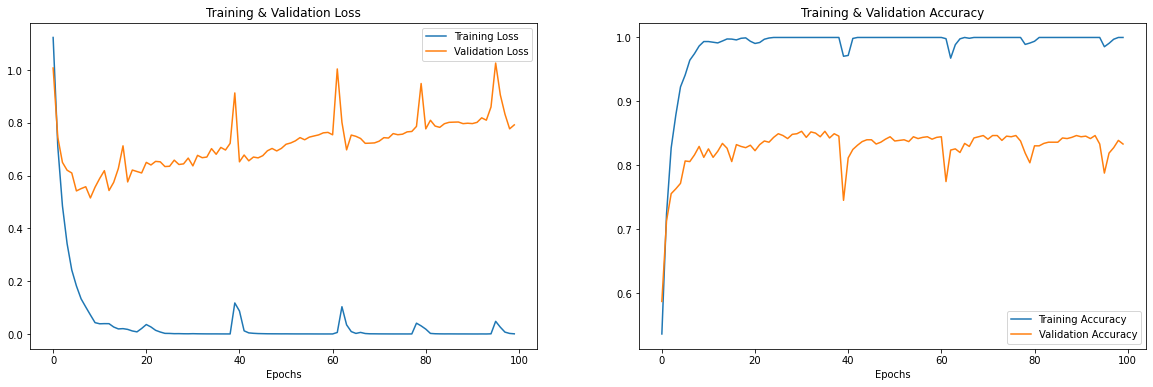

In [ ]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

4/4 [==============================] - 1s 68ms/step


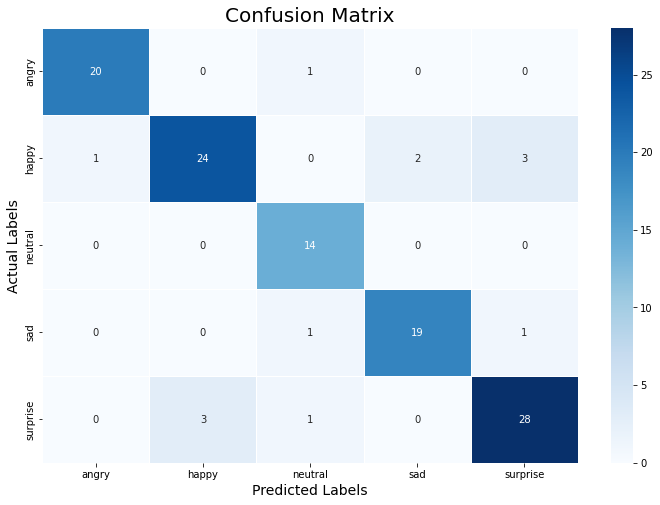

              precision    recall  f1-score   support

       angry       0.95      0.95      0.95        21
       happy       0.89      0.80      0.84        30
     neutral       0.82      1.00      0.90        14
         sad       0.90      0.90      0.90        21
    surprise       0.88      0.88      0.88        32

    accuracy                           0.89       118
   macro avg       0.89      0.91      0.90       118
weighted avg       0.89      0.89      0.89       118



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))